## $\textbf{Data Exploration}$

+ Explore the provided datasets before performing investigations using machine learning models.

In [1]:
# Import required libraries.
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### $\textbf{1. Dunking Data}$

+ Explore the ***dunking*** data (```dunking.csv```).

In [2]:
# Read in the dunking data.
dunking = pd.read_csv("../datasets/dunking-data/dunking.csv")

# View the data.
print(dunking.head().to_markdown())

|    |   surface-tension |   contact-angle |   dynamic-viscosity |   travel-distance |   dunking-time | biscuit   |
|---:|------------------:|----------------:|--------------------:|------------------:|---------------:|:----------|
|  0 |         0.0738967 |         1.33301 |         0.000998733 |        0.0111961  |        19.3622 | Digestive |
|  1 |         0.0809462 |         1.47676 |         0.00101176  |        0.00589433 |        11.8526 | Digestive |
|  2 |         0.0874079 |         1.47714 |         0.000983589 |        0.00924863 |        24.7937 | Digestive |
|  3 |         0.070793  |         1.502   |         0.0010016   |        0.00377375 |        16.2928 | Hobnob    |
|  4 |         0.0589175 |         1.54827 |         0.00100433  |        0.00229071 |        13.6623 | Hobnob    |


In [3]:
# View information about the data.
dunking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   surface-tension    3000 non-null   float64
 1   contact-angle      3000 non-null   float64
 2   dynamic-viscosity  3000 non-null   float64
 3   travel-distance    3000 non-null   float64
 4   dunking-time       3000 non-null   float64
 5   biscuit            3000 non-null   object 
dtypes: float64(5), object(1)
memory usage: 140.8+ KB


In [4]:
# View statistics about the data.
print(dunking.describe().to_markdown())

|       |   surface-tension |   contact-angle |   dynamic-viscosity |   travel-distance |   dunking-time |
|:------|------------------:|----------------:|--------------------:|------------------:|---------------:|
| count |     3000          |    3000         |      3000           |    3000           |     3000       |
| mean  |        0.0732401  |       1.44331   |         0.00100053  |       0.00624288  |       19.8487  |
| std   |        0.00995615 |       0.0949043 |         1.02051e-05 |       0.00318426  |        5.80949 |
| min   |        0.0403278  |       1.01625   |         0.000963268 |       0.000184873 |       10.0139  |
| 25%   |        0.0665874  |       1.38853   |         0.00099372  |       0.00395747  |       14.6758  |
| 50%   |        0.0731528  |       1.46311   |         0.00100056  |       0.00578906  |       19.8592  |
| 75%   |        0.0798555  |       1.51751   |         0.00100733  |       0.00807621  |       24.7761  |
| max   |        0.104563   |       1

#### $\textbf{1.1 Travel Distance}$

+ Explore how the ***travel distance*** varies as a function of the ***dunking time***.
+ Explore the distribution of ***travel distance*** values.

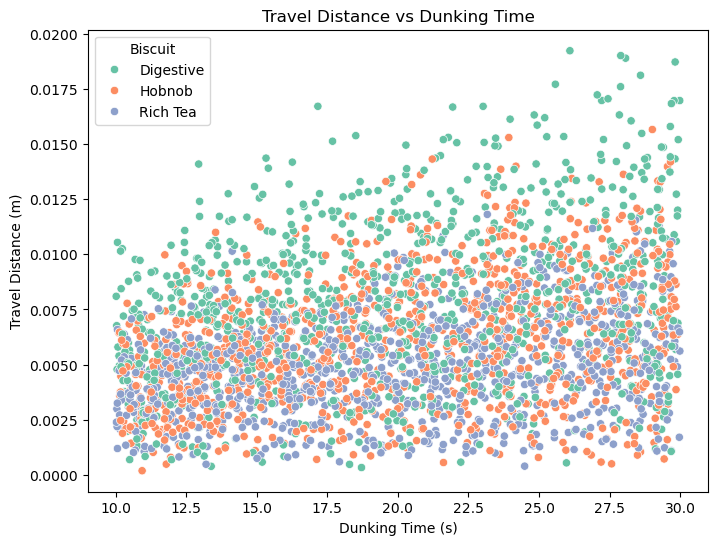

In [5]:
# Plot the travel-distance against dunking-time.
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the data.
sns.scatterplot(data=dunking, 
                x="dunking-time", 
                y="travel-distance", 
                hue="biscuit", 
                palette="Set2", 
                ax=ax)

# Set the labels.
ax.set_title("Travel Distance vs Dunking Time")
ax.set_xlabel("Dunking Time (s)")
ax.set_ylabel("Travel Distance (m)")

# Set the legend.
ax.legend(title="Biscuit")

plt.show()

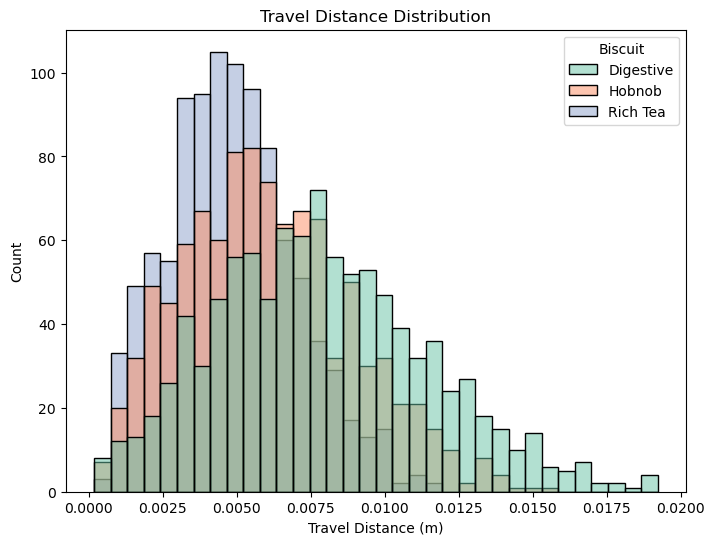

In [6]:
# Plot the distribution of travel-distance values.
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the data.
sns.histplot(data=dunking, 
             x="travel-distance", 
             hue="biscuit", 
             palette="Set2",
             ax=ax)

# Set the labels.
ax.set_title("Travel Distance Distribution")
ax.set_xlabel("Travel Distance (m)")
ax.set_ylabel("Count")

# Set the legend.
ax.get_legend().set_title("Biscuit")

plt.show()

##### $\textbf{1.1.1 Observations}$

+ Both figures show that the tea travels up the Digestive biscuit the most.

- The second figure shows that the travel distance values for each biscuit 
resemble a normal distribution.
- The distributions are a bit skewed (positive skewness) with a short left tail 
as travel distance values below 0 cannot occur.


#### $\textbf{1.2 Independent Variables}$

+ Explore how the ***travel distance*** varies as a function of the other features in the dataset.
+ Explore the distributions of the other features in the dataset.

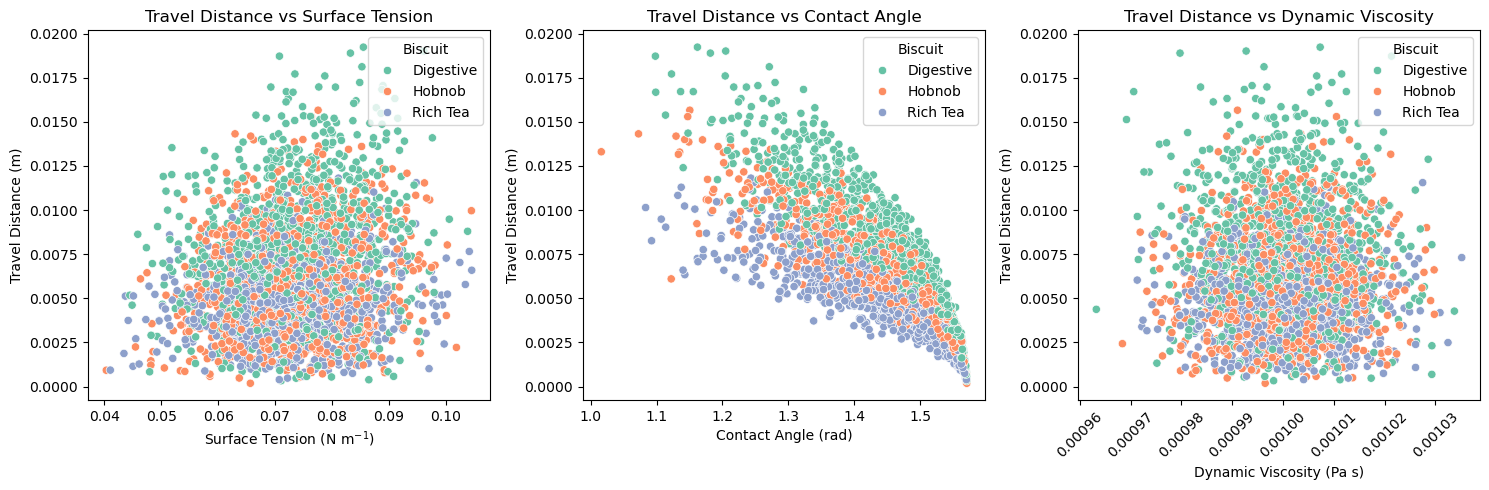

In [7]:
# Plot the travel-distance against the rest of the independent variables.
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot each independent variable.
for column, ax in zip(dunking.columns[:3], axes):
    # Plot the data.
    sns.scatterplot(data=dunking,
                    x=column,
                    y="travel-distance",
                    hue="biscuit",
                    palette="Set2",
                    ax=ax)

    # Set the y-label and legend.
    ax.set_ylabel("Travel Distance (m)")
    ax.legend(title="Biscuit", loc="upper right")

# Set the titles.
axes[0].set_title("Travel Distance vs Surface Tension")
axes[1].set_title("Travel Distance vs Contact Angle")
axes[2].set_title("Travel Distance vs Dynamic Viscosity")

# Set the x-labels.
axes[0].set_xlabel(r"Surface Tension (N $\text{m}^{-1}$)")
axes[1].set_xlabel("Contact Angle (rad)")
axes[2].set_xlabel("Dynamic Viscosity (Pa s)")

# Rotate the x-labels for the Dynamic Viscosity plot.
axes[2].tick_params(axis="x", labelrotation=45)

fig.tight_layout()
plt.show()

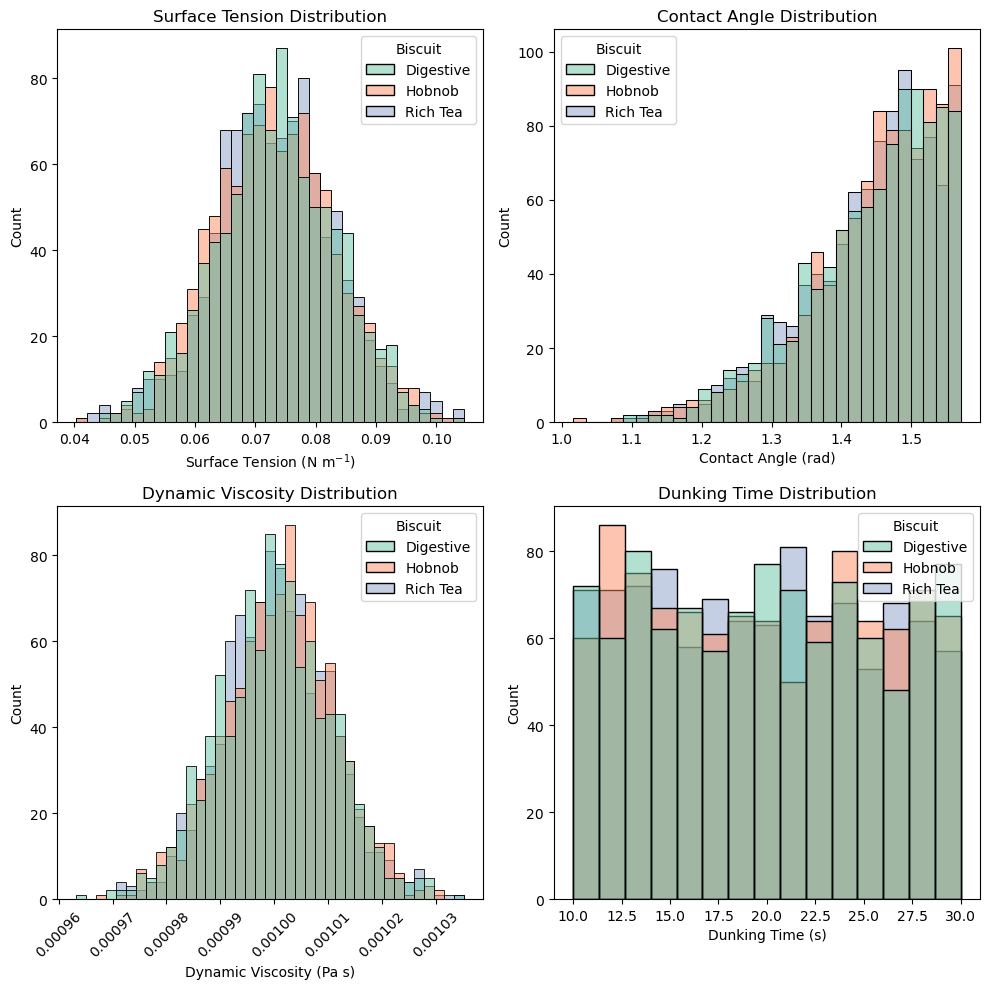

In [8]:
# Plot the distribution of the independent variables.
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Set the independent variables to plot.
columns = dunking.columns[:3].to_list()
columns.append("dunking-time")

# Plot each independent variable.
for column, ax in zip(columns, axes.flatten()):
    # Plot the data.
    sns.histplot(data=dunking,
                 x=column,
                 hue="biscuit",
                 palette="Set2",
                 ax=ax)

    # Set the y-label and legend.
    ax.set_ylabel("Count")
    ax.get_legend().set_title("Biscuit")

# Set the titles.
axes[0, 0].set_title("Surface Tension Distribution")
axes[0, 1].set_title("Contact Angle Distribution")
axes[1, 0].set_title("Dynamic Viscosity Distribution")
axes[1, 1].set_title("Dunking Time Distribution")

# Set the x-labels.
axes[0, 0].set_xlabel(r"Surface Tension (N $\text{m}^{-1}$)")
axes[0, 1].set_xlabel("Contact Angle (rad)")
axes[1, 0].set_xlabel("Dynamic Viscosity (Pa s)")
axes[1, 1].set_xlabel("Dunking Time (s)")

# Rotate the x-labels for the Dynamic Viscosity plot.
axes[1, 0].tick_params(axis="x", labelrotation=45)

fig.tight_layout()
plt.show()

##### $\textbf{1.2.1 Observations}$

+ The first set of plots show that the travel distance has a strong correlation 
to the contact angle.
+ This could make the contact angle an important feature when training machine 
learning models.

- The second set of plots show that the features in dataset follow a normal 
distribution except for the dunking time.
- The dunking time follows a uniform distribution which means that there are a 
similar number of samples at different dunking times.

+ At first glance it might look like the contact angle does not follow a normal 
distribution.
+ However, it follows a half-normal distribution and this makes sense as the 
contact angle is capped at 90 degrees (&pi;/2 radians).

### $\textbf{2. Microscope Data}$

+ Explore the ***microscope*** data (```microscope.csv```).

- Explore how the ***travel distance*** varies as a function of the ***pore radius***.
- Explore the distribution of ***pore radius*** values.

In [9]:
# Read in the microscope data.
microscope = pd.read_csv("../datasets/microscope-data/microscope.csv")

# View the data.
print(microscope.head().to_markdown())

|    |   surface-tension |   contact-angle |   dynamic-viscosity |   travel-distance |   dunking-time |   pore-radius |
|---:|------------------:|----------------:|--------------------:|------------------:|---------------:|--------------:|
|  0 |         0.0845956 |         1.55737 |         0.000981483 |       0.00322055  |        24.2311 |   7.45371e-07 |
|  1 |         0.0642912 |         1.53884 |         0.000997503 |       0.00239506  |        22.1698 |   2.60068e-07 |
|  2 |         0.0862236 |         1.54614 |         0.00100762  |       0.00303645  |        23.2577 |   3.73462e-07 |
|  3 |         0.0828591 |         1.56688 |         0.000997457 |       0.00126069  |        12.7174 |   7.56717e-07 |
|  4 |         0.0908324 |         1.57023 |         0.00100171  |       0.000576075 |        15.1891 |   8.23907e-07 |


In [10]:
# View information about the data.
microscope.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   surface-tension    500 non-null    float64
 1   contact-angle      500 non-null    float64
 2   dynamic-viscosity  500 non-null    float64
 3   travel-distance    500 non-null    float64
 4   dunking-time       500 non-null    float64
 5   pore-radius        500 non-null    float64
dtypes: float64(6)
memory usage: 23.6 KB


In [11]:
# View statistics about the data.
print(microscope.describe().to_markdown())

|       |   surface-tension |   contact-angle |   dynamic-viscosity |   travel-distance |   dunking-time |   pore-radius |
|:------|------------------:|----------------:|--------------------:|------------------:|---------------:|--------------:|
| count |      500          |     500         |       500           |     500           |      500       | 500           |
| mean  |        0.0731971  |       1.44893   |         0.00100028  |       0.00606991  |       19.7572  |   5.34486e-07 |
| std   |        0.00995634 |       0.0955806 |         1.01303e-05 |       0.0031803   |        5.80353 |   2.16352e-07 |
| min   |        0.0434284  |       1.07271   |         0.000970636 |       0.000482797 |       10.0139  |   1.56296e-07 |
| 25%   |        0.0667408  |       1.4043    |         0.000993475 |       0.00384281  |       14.8446  |   3.27821e-07 |
| 50%   |        0.0733907  |       1.47198   |         0.00100059  |       0.00554956  |       19.8468  |   4.938e-07   |
| 75%   |       

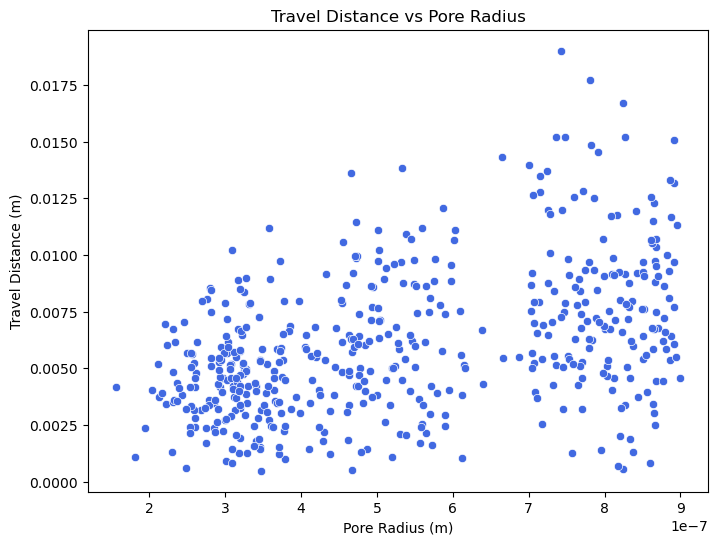

In [12]:
# Plot the travel-distance against dunking-time.
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the data.
sns.scatterplot(data=microscope, 
                x="pore-radius", 
                y="travel-distance", 
                color="royalblue", 
                ax=ax)

# Set the labels.
ax.set_title("Travel Distance vs Pore Radius")
ax.set_xlabel("Pore Radius (m)")
ax.set_ylabel("Travel Distance (m)")

plt.show()

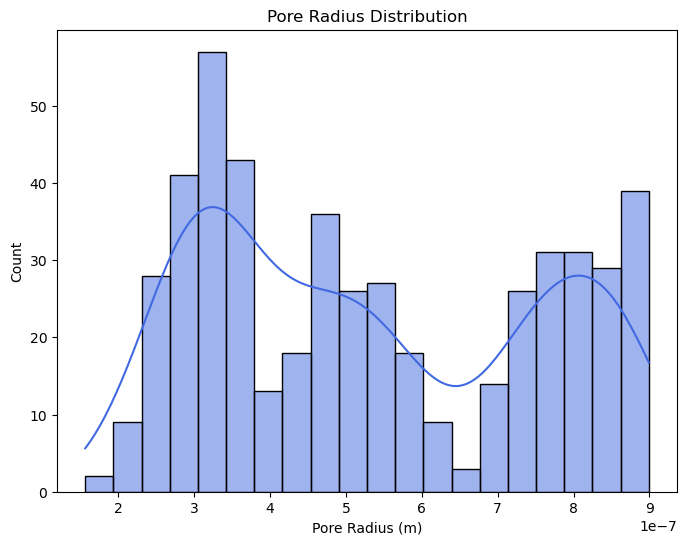

In [13]:
# Plot the distribution of pore-radius values.
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the data.
sns.histplot(data=microscope, 
             x="pore-radius",
             bins=20,
             kde=True, 
             color="royalblue",  
             ax=ax)

# Set the labels.
ax.set_title("Pore Radius Distribution")
ax.set_xlabel("Pore Radius (m)")
ax.set_ylabel("Count")

plt.show()

#### $\textbf{2.1 Observations}$

+ Both figures show that the pore radius values can be split into three groups.

- The first figure shows that the average travel distance increases as the pore 
radius increases.

+ The second figure shows that the pore radius values could be modelled using 
three normal distributions.
+ Each normal distribution would correspond to the pore radius of each biscuit 
being investigated.

### $\textbf{3. Time Series Data}$

+ Explore the ***time series*** data (```times-series-[1|2|3].csv```)

In [14]:
# Read in the time series data.
time_series_1 = pd.read_csv("../datasets/time-series-data/time-series-1.csv")
time_series_2 = pd.read_csv("../datasets/time-series-data/time-series-2.csv")
time_series_3 = pd.read_csv("../datasets/time-series-data/time-series-3.csv")

# View the 1st time series data.
print(time_series_1.head().to_markdown())

|    |   dunking-time |   travel-distance |   travel-distance-error |
|---:|---------------:|------------------:|------------------------:|
|  0 |        30      |        0.00808733 |             0.000392256 |
|  1 |        32.7273 |        0.00825305 |             0.000270256 |
|  2 |        35.4545 |        0.00860703 |             0.000500771 |
|  3 |        38.1818 |        0.00892041 |             0.000266705 |
|  4 |        40.9091 |        0.00960407 |             0.000273968 |


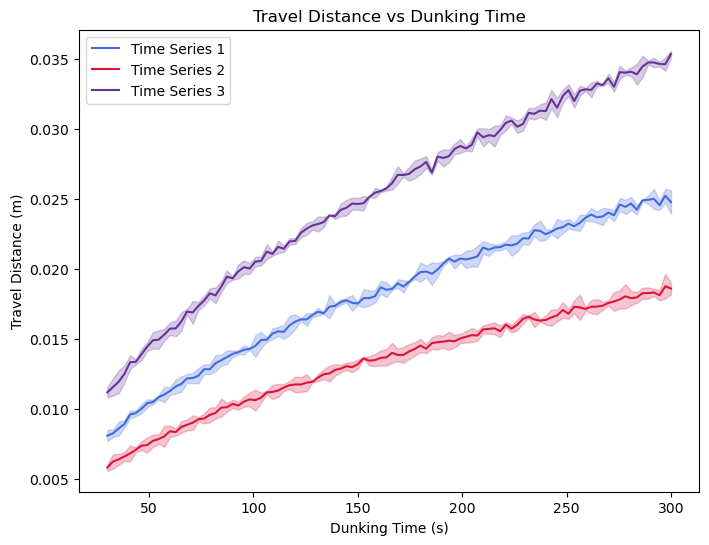

In [15]:
# Plot the time series data.
fig, ax = plt.subplots(figsize=(8, 6))

# Store the different data in a tuple.
time_series_data = (time_series_1, time_series_2, time_series_3)

# Set the colour and label for each time series data.
colours = ("royalblue", "crimson", "rebeccapurple")
labels = ("Time Series 1", "Time Series 2", "Time Series 3")

# Plot each time series data.
for time_series, colour, label in zip(time_series_data, colours, labels):
    # Plot the data.
    ax.plot(time_series["dunking-time"], 
            time_series["travel-distance"],
            color=colour,
            label=label)
    
    # Plot the errors.
    ax.fill_between(time_series["dunking-time"], 
                    time_series["travel-distance"] - time_series["travel-distance-error"],
                    time_series["travel-distance"] + time_series["travel-distance-error"],
                    color=colour,
                    alpha=0.25)
    
# Set the labels.
ax.set_title("Travel Distance vs Dunking Time")
ax.set_xlabel("Dunking Time (s)")
ax.set_ylabel("Travel Distance (m)")

# Set the legend.
ax.legend()

plt.show()

#### $\textbf{3.1 Observations}$

+ Using the distribution of travel distance values from section 1.1, we can 
guess which biscuit each time series data belongs to.

- Time Series Data 1 - Hobnob
- Time Series Data 2 - Rich Tea
- Time Series Data 3 - Digestive